# Projeto final da terceira imersão de dados da Alura
---

Olá! Bem vindo ao meu projeto final da terceira imersão de dados da Alura! Nele, como descrito no `README`, pretendo ao final descobrir modelos para responder qual ação aquele determinado composto causou (podendo ser mais de uma até). Então, vamos nessa?

## Analise inicial

Primeiramente, vamos fazer uma análise geral dos nossos dados, carrega-los e analisar as colunas. Antes de iniciar, é importante falar sobre o nosso dataset. Trata-se de um dataset com o intuito de descobrimento de novas drogas. Isso pode ser analisado, verificando quais expressoes geneticas foram alterados, quais grupos celulares foram atingidos, e quais mecanismos de ação foram ativados. Cada linha trata-se de um experimento em uma cultura celular com um determinado composto candidato a droga.

In [ ]:
import pandas as pd

data_url = 'https://github.com/CidSantiago/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'

data = pd.read_csv(data_url, compression= 'zip')

data.head()

id tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

In [ ]:
data.shape

(23814, 877)

In [ ]:
data.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

In [ ]:
temp = []
for column in data.columns:
    if 'g-' in column:
        temp.append(column)

print('Inicio dos gs: ',temp[0],'\nFinal dos gs: ', temp[-1])

Inicio dos gs:  g-0 
Final dos gs:  g-771


In [ ]:
temp = []
for column in data.columns:
    if 'c' in column:
        temp.append(column)

print('Inicio dos cs: ',temp[0],'\nFinal dos cs: ', temp[-1])

Inicio dos cs:  c-0 
Final dos cs:  c-99


Com isso, sabemos que nosso dataset possuí 23814 linhas e 877 colunas, onde essas colunas consistem em 'id','tratamento', 'tempo', 'dose', 'droga','g-n' e 'c-m', onde 'n' é um número entre 0 e 771 e 'm' é um numero entre 0 e 99. Mas o que significa esses Gs e Cs?

'g' e 'c' se refere a expressão genética em cada gene ou grupo celular, respectivamente, onde 1 é o valor base de replicação das proteínas desse gene. Sobre a influência de determinado composto, essa gene pode produzir 2 vezes mais essa proteina, ou 2 vezes menos. Nesse caso, a expressão genética seria 2 e 0.5, respectivamente. Contudo, vamos olhar os intervalos que nossos g's se encontram:

In [ ]:
data.loc[:,'g-0':'g-771'].describe()

g-0           g-1  ...         g-770         g-771
count  23814.000000  23814.000000  ...  23814.000000  23814.000000
mean       0.248366     -0.095684  ...     -0.219210      0.101524
std        1.393399      0.812363  ...      1.326193      1.417674
min       -5.513000     -5.737000  ...    -10.000000    -10.000000
25%       -0.473075     -0.562200  ...     -0.554400     -0.523800
50%       -0.008850     -0.046600  ...      0.028700     -0.006500
75%        0.525700      0.403075  ...      0.496400      0.536950
max       10.000000      5.039000  ...     10.000000     10.000000

[8 rows x 772 columns]

In [ ]:
data.loc[:,'g-0':'g-771'].dtypes.unique()

array([dtype('float64')], dtype=object)

In [ ]:
max_g = data.loc[:,'g-0':'g-771'].max().max()
min_g = data.loc[:,'g-0':'g-771'].min().min()

print('Valor minimo de g: ', min_g,'\nValor máximo de g: ', max_g)

Valor minimo de g:  -10.0 
Valor máximo de g:  10.0


Estranho, não é? Se as expressões geneticas são numeros positivos, como podemos ter valores negativos (como pode ser visto pelos mínimos do describe)? Isso ocorre pois provavelmente os valores estão normalizados, entre -10 e +10. Nas aulas foi mencionado que esses valores passaram por 10 transformações, o que provavelmente explica essas valores visualizados.

Vamos analisar agora as outras colunas:
* **id** : Trata-se do identificador único daquele experimento em específico.
* **tratamento**: Coluna que indica se aquele experimento consiste em um grupo de controle (`valor = com_controle`), utilizado como referência dos efeitos dos outros experimentos, ou se foi um experimento realizado com um composto candidato a droga propriamente dito (`valor = com_droga`)
* **tempo**: Coluna que indica o tempo de exposição ao composto candidato a droga. Possui valores 24, 48 e 72, provavelmente em horas.
* **dose** : Coluna que indica qual foi a dosagem fornecida no experimento. Possui os valores D1 e D2. Não temos como afirmar qual é a maior dosagem, podendo apenas saber se houve diferença entre elas.
* **droga**: Coluna que indica qual o composto candidato a droga foi utilizado, de forma anonimizada. Essa anonimização ocorre para que não haja qualquer tipo de vies do pesquisador ao explorar os dados.

In [ ]:
data.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

In [ ]:
data.tratamento.unique()

array(['com_droga', 'com_controle'], dtype=object)

In [ ]:
data.tempo.unique()

array([24, 72, 48])

In [ ]:
data.droga.unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Com isso analisado, vamos a segunda parte do nosso dataset: os resultados.

In [ ]:
data_resultados = pd.read_csv('https://github.com/CidSantiago/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')

data_resultados.head()


id  ...  wnt_inhibitor
0  id_000644bb2  ...              0
1  id_000779bfc  ...              0
2  id_000a6266a  ...              0
3  id_0015fd391  ...              0
4  id_001626bd3  ...              0

[5 rows x 207 columns]

Nesse dataset, podemos perceber logo de cara que também temos a coluna 'id'. Essa coluna será utilizada para unir os nossos dois datasets em um só, se for pertinente, posteriormente. Por enquanto, podemos ver que trata-se de varias colunas de mecanismos de ação, com o formato "alvo_ação". Dessa tabela serão retirados as identificações para o treinamento do nosso modelo.

In [ ]:
data_resultados.drop('id', axis=1).max().max()

1

In [ ]:
data_resultados.drop('id', axis=1).min().min()

0

Verificamos que, no dataset de resultados, só possui valores 1 e 0, onde 0 indica que não ativou esse mecanismo de ação e 1 ativou o mecanismo de ação.

## Exploração dos dados

Agora que já entendemos como nosso dataset está estruturado, vamos explorá-lo um pouco, com o intuito de entender melhor o que está acontecendo com as variáveis.

In [ ]:
data[data.tratamento == 'com_controle'].droga.unique()


array(['cacb2b860'], dtype=object)

O primeiro achado que temos é que todos os experimentos de controle possuem o mesmo valor na coluna 'droga'. O que ocorre é que esse composto deve corresponder a um solvente comum utilizado nos experimentos. 

Text(0, 0.5, 'Frequencia')

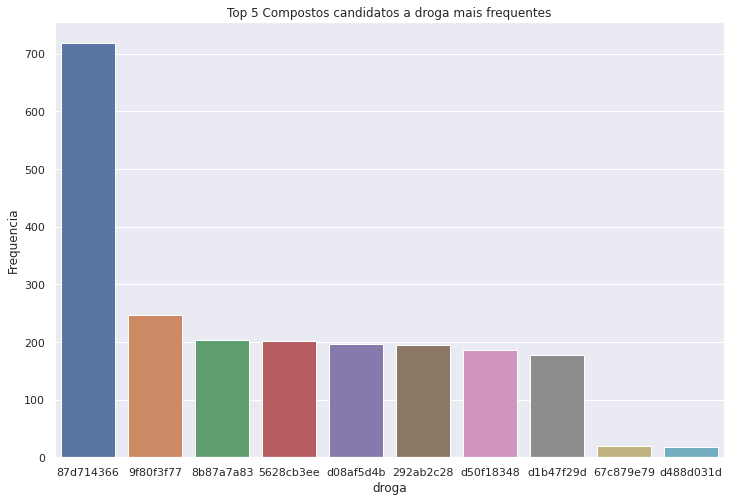

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cod_drogas = data[data.tratamento == 'com_droga'].droga.value_counts().index[:10]
top10drogas = data.query('droga in @cod_drogas')

sns.set()

plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'droga', data=top10drogas, order = top10drogas['droga'].value_counts().index)
ax.set_title('Top 5 Compostos candidatos a droga mais frequentes')
ax.set_ylabel('Frequencia')


Nesse gráfico, visualizamos os 10 compostos candidatos a droga mais frequentes no nosso dataset. Foram retirados os experimentos de controle, pois não seria relevante para essa análise. Com essa visualização, conseguimos identificar que 8 composto foram muito mais experimentados do que os outros, enquanto o maior dele, com a identificação '87d714366', foi muito mais que qualquer outro. A motivação para tal podem ter sido das mais diversas, desde esses 8 serem os mais promissores devido a estudos prévios, ou mesmo os que estão apresentando os melhores resultados para o objetivo definido pelos pesquisadores.

In [ ]:
data

id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[23814 rows x 877 columns]

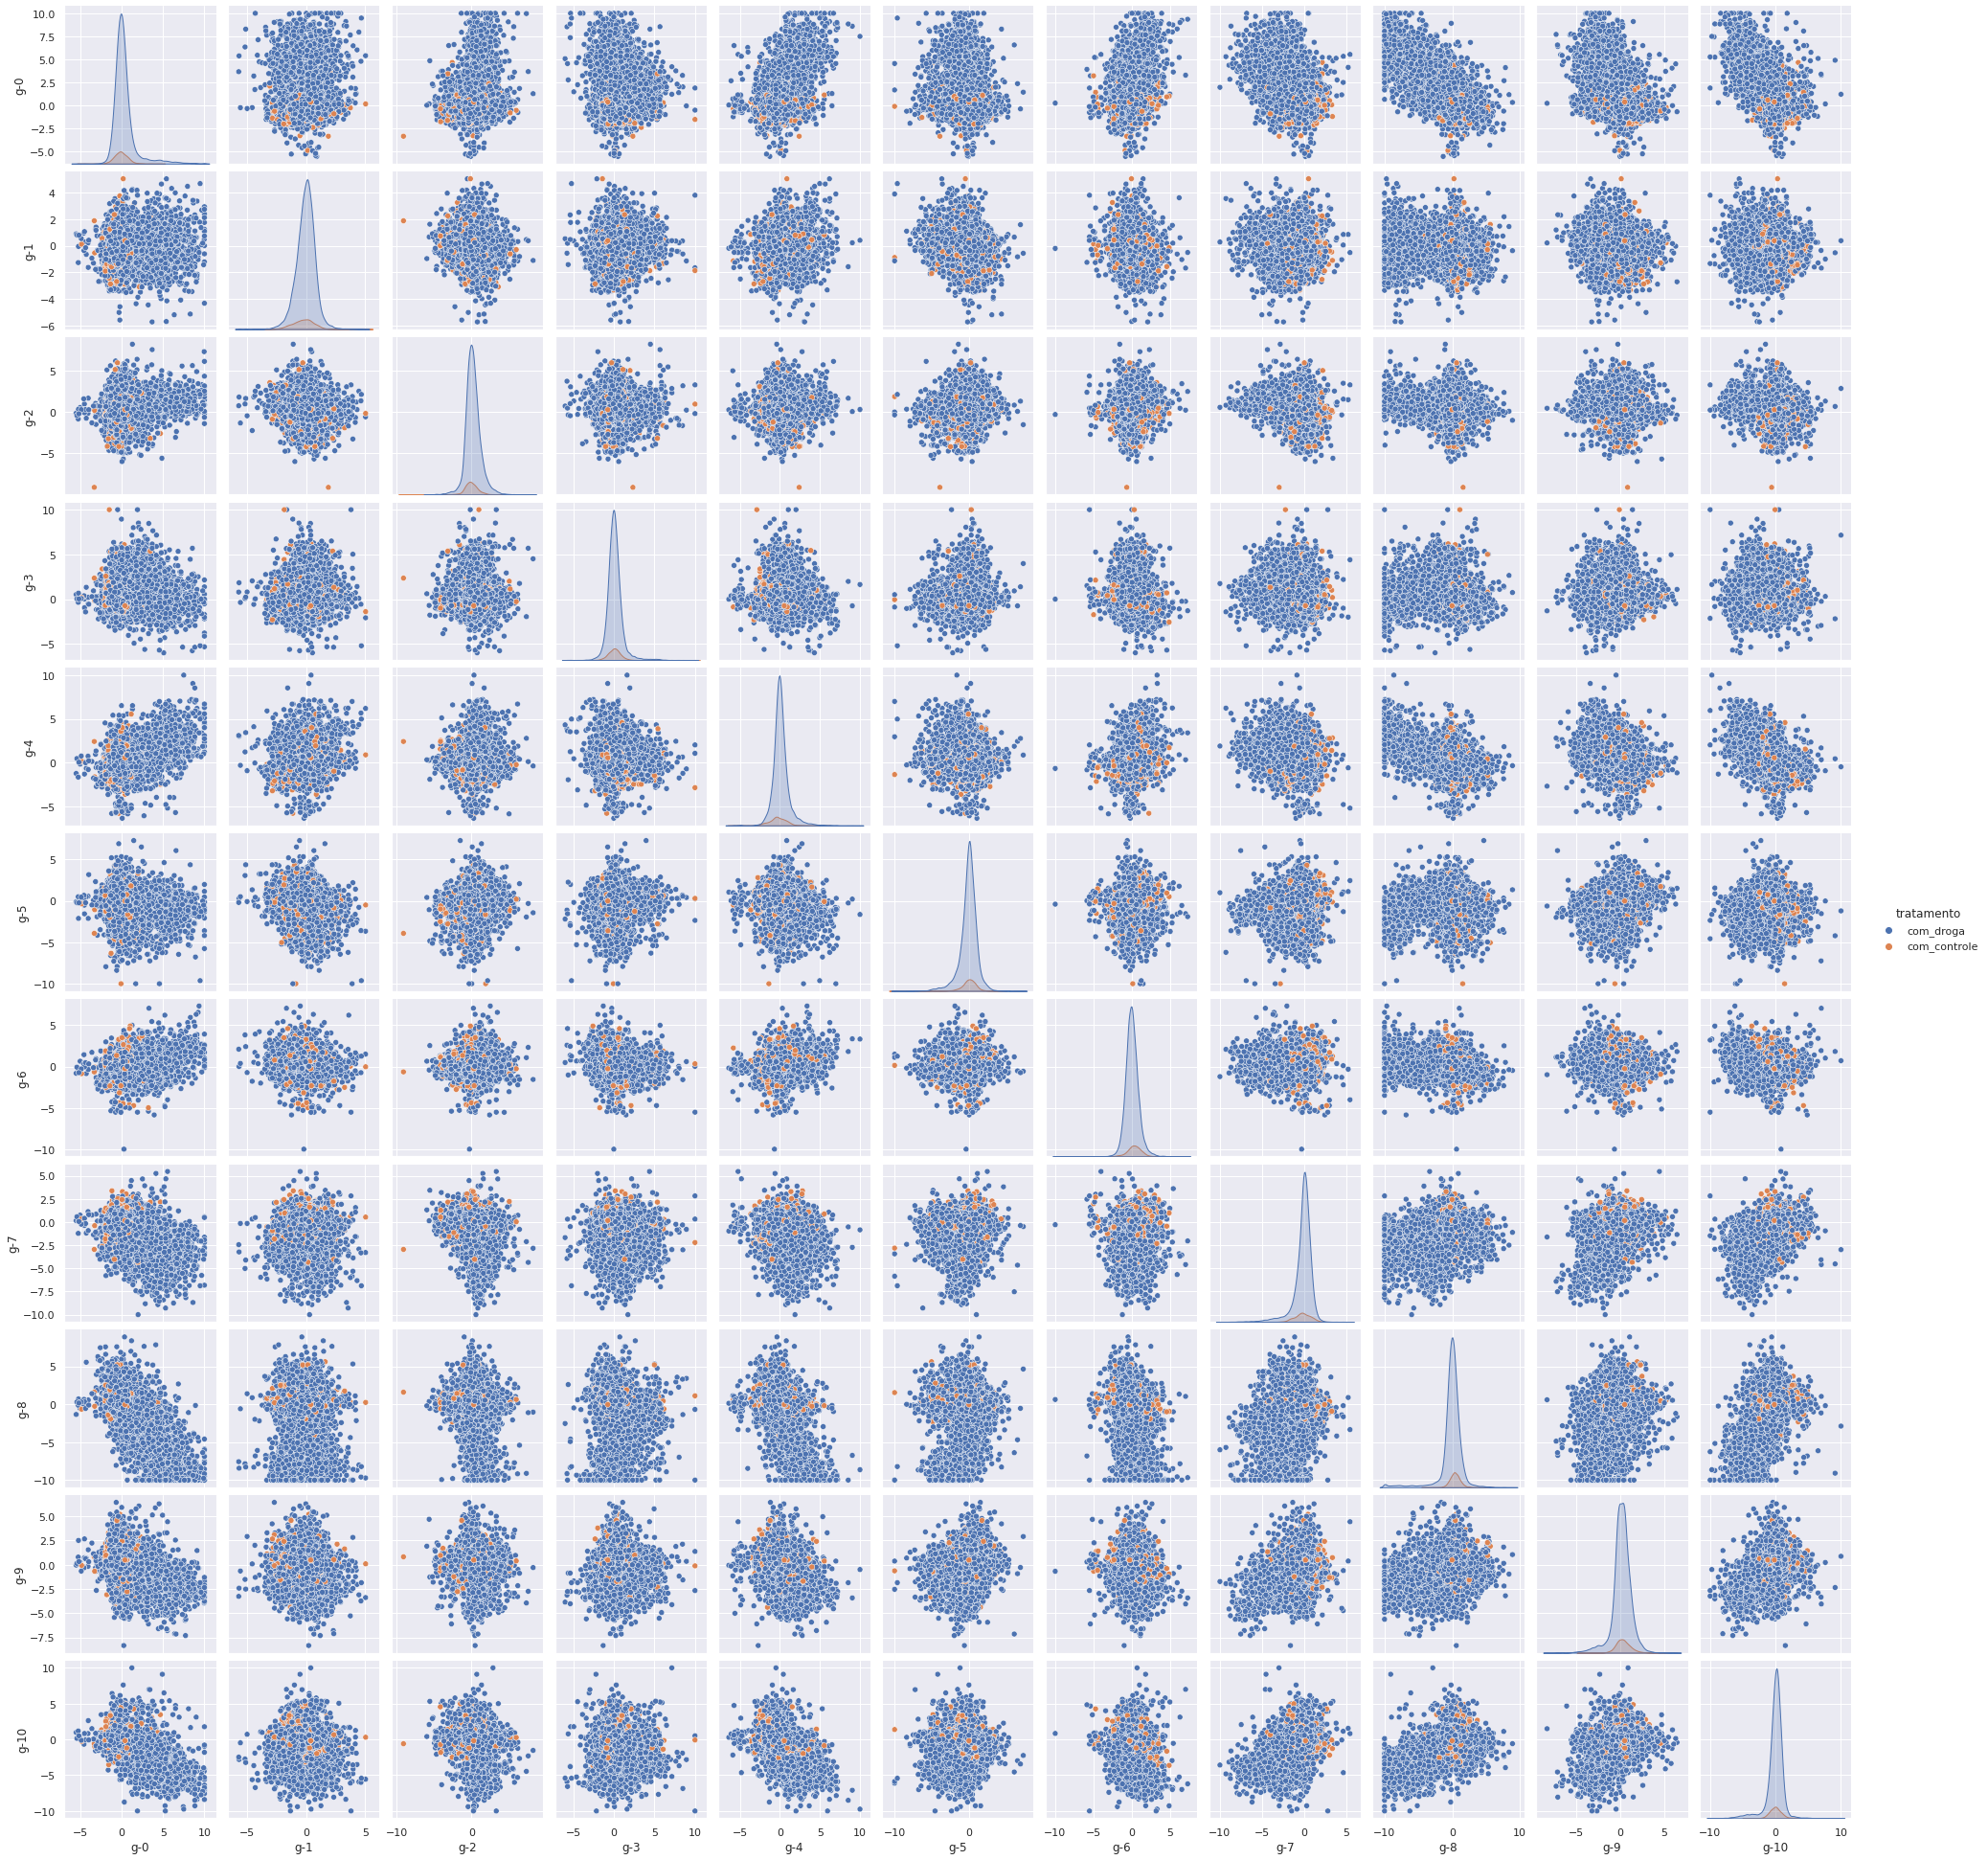

In [ ]:
plot_data = pd.concat([data['tratamento'], data.loc[:,'g-0':'g-10']], axis=1)

sns.pairplot(plot_data, hue="tratamento", height=2.5)

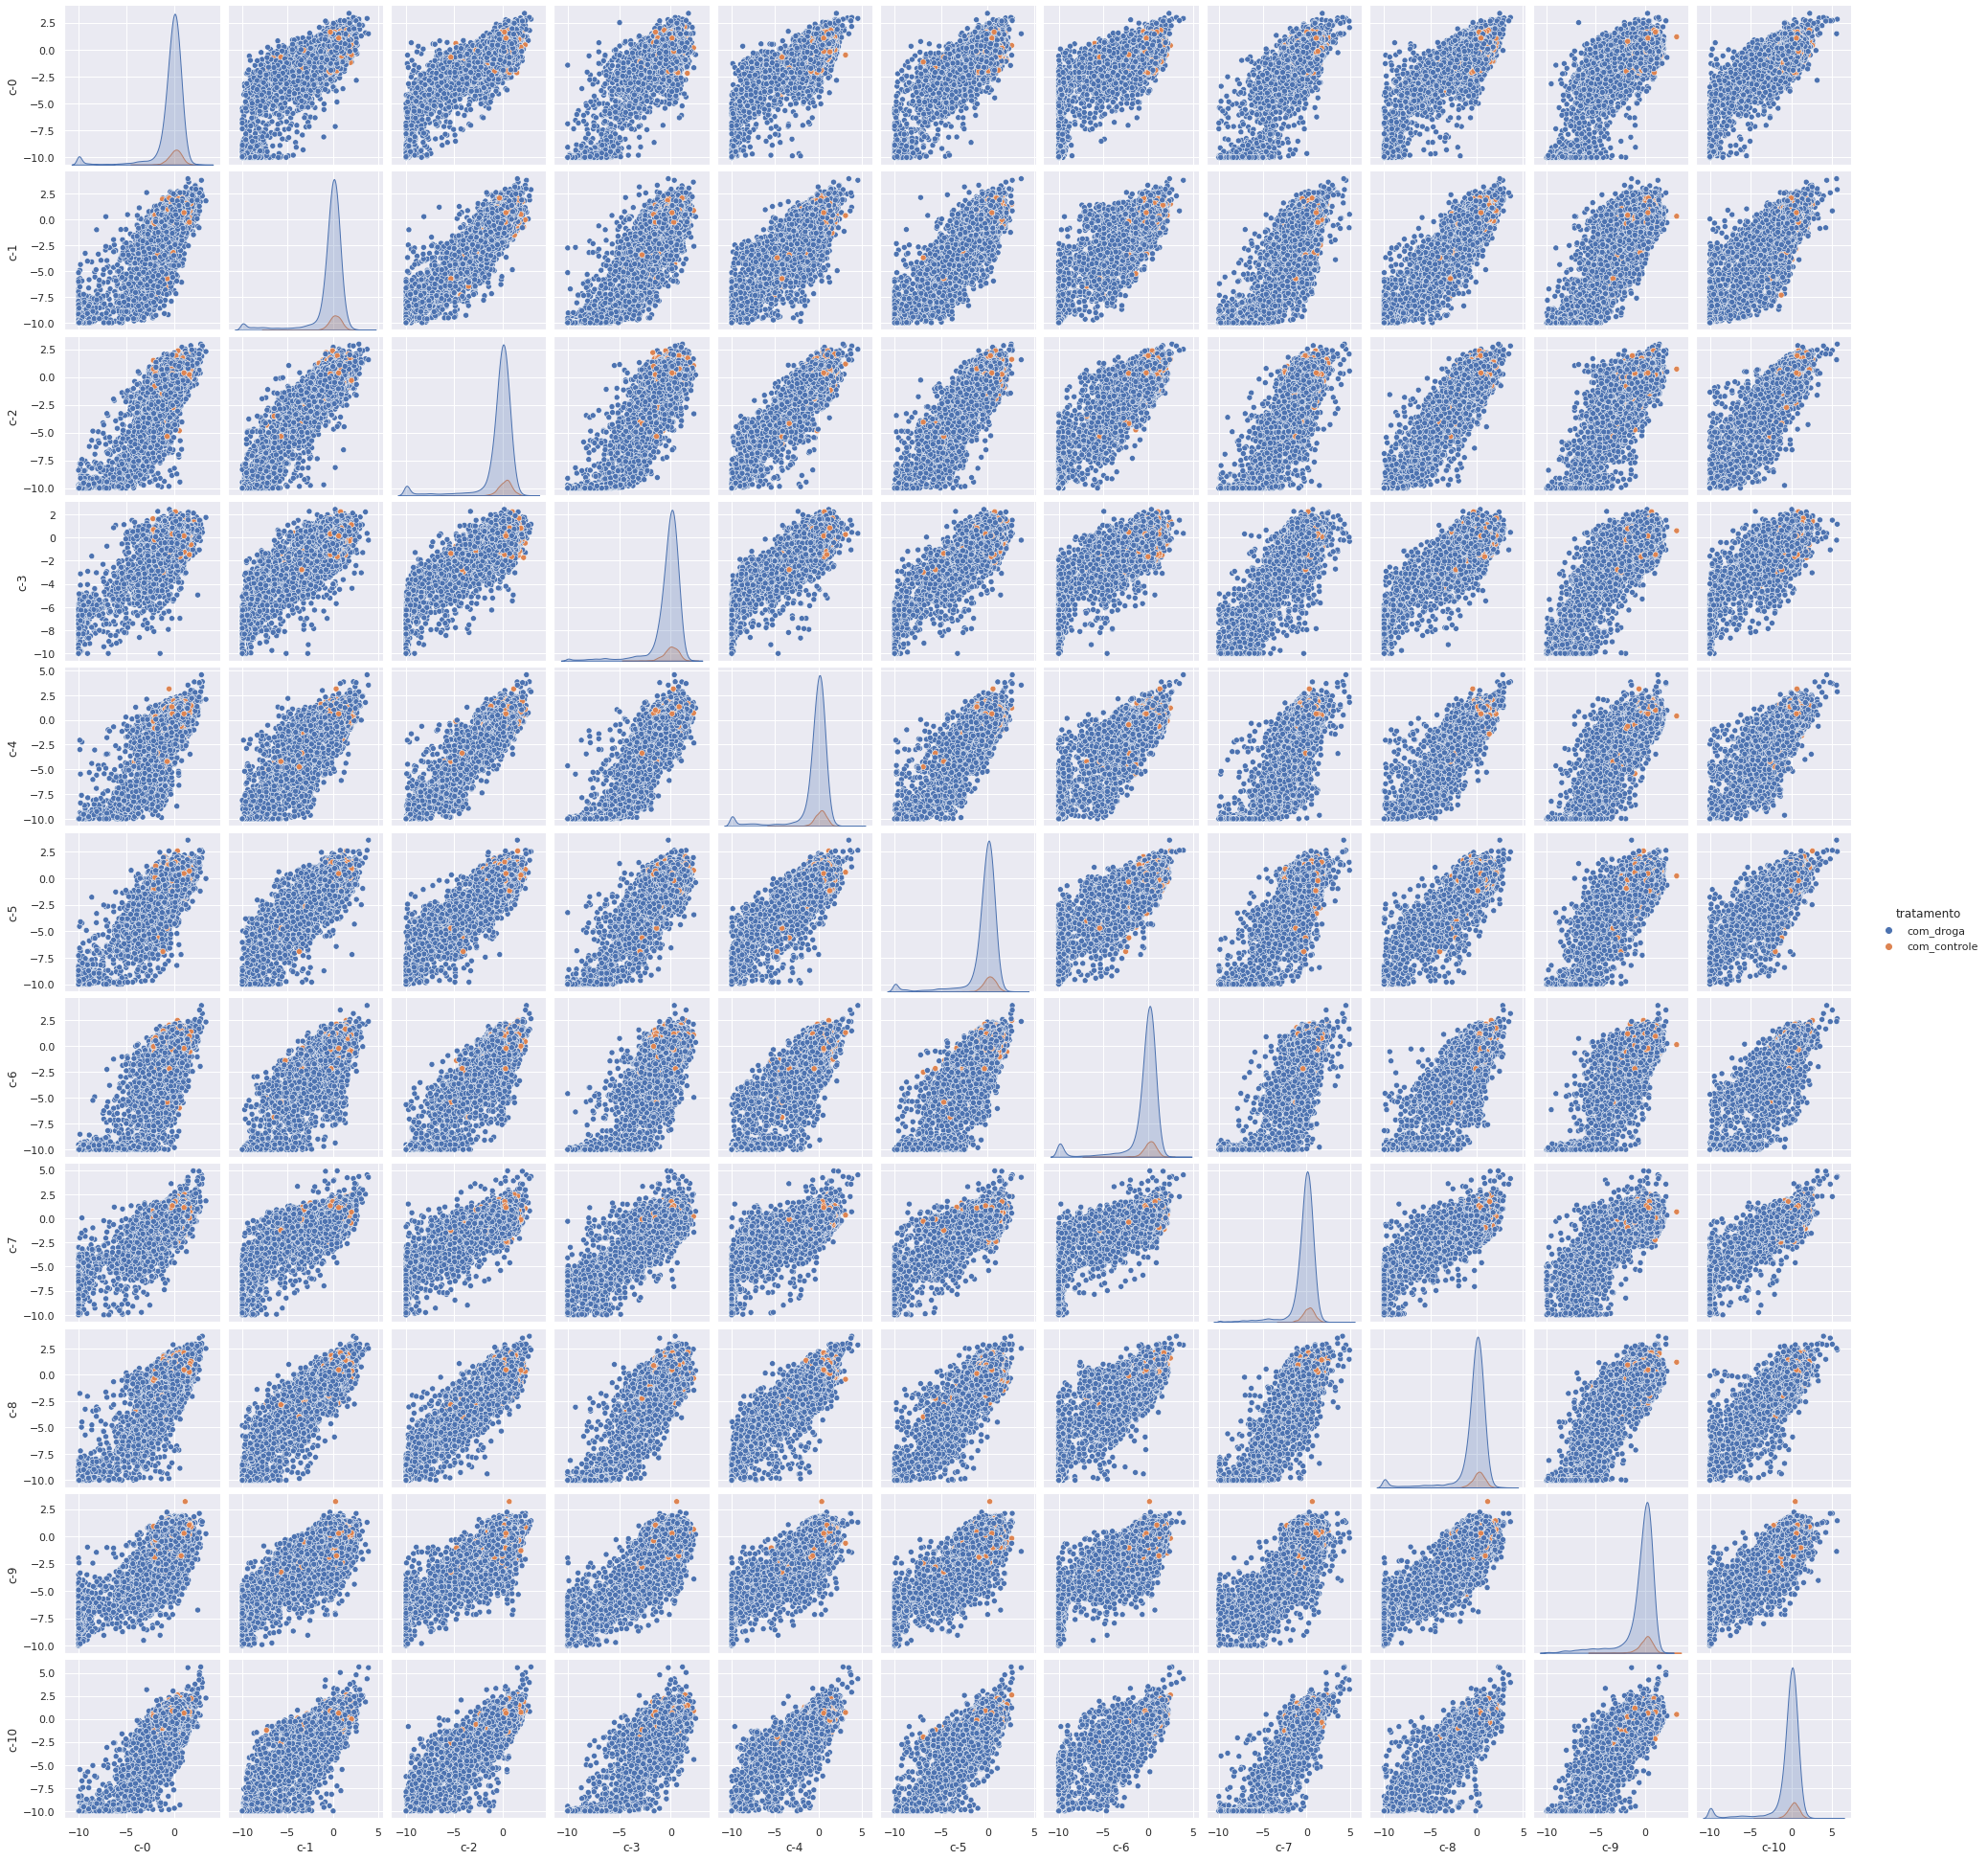

In [ ]:
plot_data = pd.concat([data['tratamento'], data.loc[:,'c-0':'c-10']], axis=1)

sns.pairplot(plot_data, hue="tratamento", height=2.5)

A ideia dos 'pairplots' era identificar tendencias nas variaveis, ou distribuições estranhas. Foram analizados apenas os primeiros 10 Gs e Cs, por motivos de performance e visualização. Os graficos, consistem em 'scatter plots' fora das diagonais, que são plots utilizando os valores das variaveis como coordenadas cartesianas, e histogramas nas diagonais. Os histogramas se mostraram bem balanceados, o que é de se esperar, já que os dados foram passados por transformações já. Quanto aos scatter plots, enquanto os dos Gs são mais diversos, os Cs se mostraram tendenciosos a se correlacionar positivamente. Vamos verificar isso atraves de uma matriz de correlação.

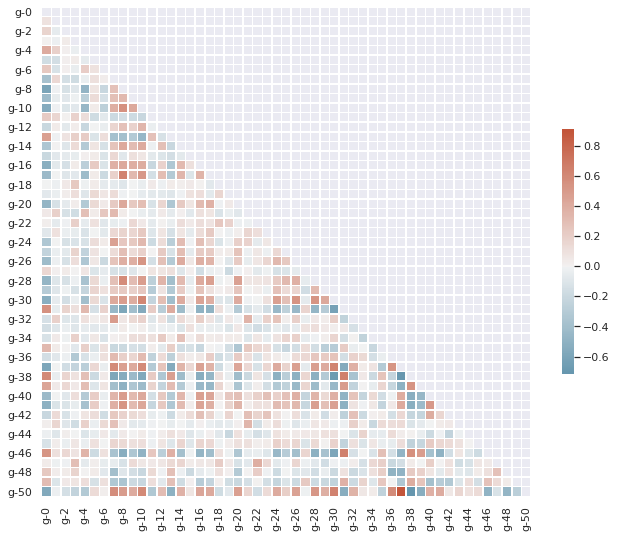

In [ ]:
import numpy as np

corr = data.loc[:, 'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

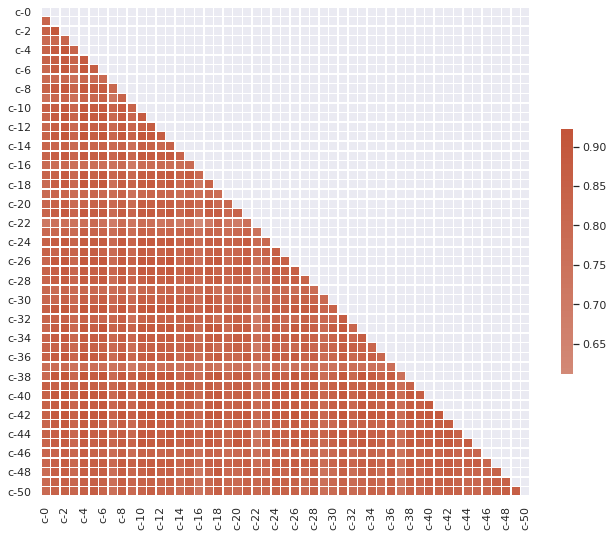

In [ ]:
import numpy as np

corr = data.loc[:, 'c-0':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

De fato, existe uma forte correlação positiva entre os Cs, enquanto os graficos de Gs são mais diversos. 

O que isso significa? Que, de certa forma, ao analisar como o todo, os Cs passam 'a mesma informação' para modelos em geral, podendo ser descartados em alguns casos. Em alguns casos, quando se vai treinar um modelo de aprendizado de máquina, é recomendado descartar os muito correlatos, pois passam a mesma informação, sendo 'desperdicio computacional' levar os dois em conta, enquanto se pode levar somente um. Além disso, [multicolinearidade](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/) afeta modelos de regressão de forma negativa. Nesse caso específico não é tão simples assim. Dependendo de qual grupo celular você estiver focando, pode ser necessário mante-lo, apesar da alta correlação.

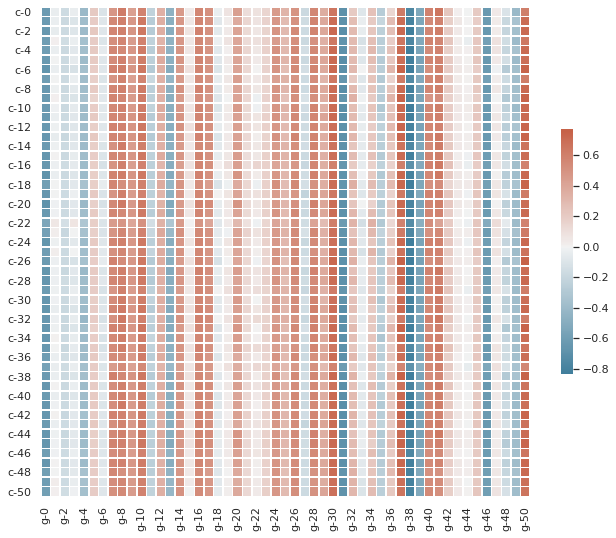

In [ ]:
G_s = [f'g-{i}' for i in range(51)]

C_s = [f'c-{i}' for i in range(51)]

gs_and_cs = data.loc[:, G_s + C_s]

corr_GsCs = gs_and_cs.corr().loc['c-0':'c-50','g-0':'g-50']

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratiocorr
sns.heatmap(corr_GsCs, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Nessa matriz, foi correlacionado os Gs com os Cs, e percebe um comportamento 'vertical' nela. O que isso indica é que os genes afetam, em geral, similarmente todos os grupos celulares. Por exemplo, o quando o g-50 aumenta sua expressão genetica, todos os Cs aumentam também, indicado pela alta correlação mostrada no gráfico.

Agora, vamos analisar os resultados:

In [ ]:
data_resultados['n_moa'] = data_resultados.drop('id', axis=1).sum(axis=1)
data_resultados['ativo_moa'] = (data_resultados['n_moa'] != 0)

data_resultados

id  5-alpha_reductase_inhibitor  ...  n_moa  ativo_moa
0      id_000644bb2                            0  ...      1       True
1      id_000779bfc                            0  ...      0      False
2      id_000a6266a                            0  ...      3       True
3      id_0015fd391                            0  ...      0      False
4      id_001626bd3                            0  ...      1       True
...             ...                          ...  ...    ...        ...
23809  id_fffb1ceed                            0  ...      1       True
23810  id_fffb70c0c                            0  ...      1       True
23811  id_fffc1c3f4                            0  ...      0      False
23812  id_fffcb9e7c                            0  ...      1       True
23813  id_ffffdd77b                            0  ...      0      False

[23814 rows x 209 columns]

In [ ]:
data_completo = data.merge(data_resultados, on='id')
data_completo

id    tratamento  tempo  ... wnt_inhibitor n_moa  ativo_moa
0      id_000644bb2     com_droga     24  ...             0     1       True
1      id_000779bfc     com_droga     72  ...             0     0      False
2      id_000a6266a     com_droga     48  ...             0     3       True
3      id_0015fd391     com_droga     48  ...             0     0      False
4      id_001626bd3     com_droga     72  ...             0     1       True
...             ...           ...    ...  ...           ...   ...        ...
23809  id_fffb1ceed     com_droga     24  ...             0     1       True
23810  id_fffb70c0c     com_droga     24  ...             0     1       True
23811  id_fffc1c3f4  com_controle     48  ...             0     0      False
23812  id_fffcb9e7c     com_droga     24  ...             0     1       True
23813  id_ffffdd77b     com_droga     72  ...             0     0      False

[23814 rows x 1085 columns]

In [ ]:
data_resultados['n_moa'].value_counts()

1    12532
0     9367
2     1538
3      303
4       55
5       13
7        6
Name: n_moa, dtype: int64

Primeiro, vamos checar as consistências nos dados. Foram criadas duas colunas extras para simplificar as verificações. 'ativo_moa' indico se algum mecanismo de ação foi ativado naquele experimento, e 'n_moa' indica quantos mecanismos de ação foram ativados. Foi verificado que até 15 mecanismos de ação puderam ser ativados ao mesmo tempo, mesmo o mais comum entre os experimentos serem 3 mecanismos de ação.

In [ ]:
results = data_resultados[data_resultados['n_moa'] == 3]

results.drop(['id','n_moa','ativo_moa'], axis=1).sum().sort_values(ascending=False)[:30]

kit_inhibitor                        236
pdgfr_inhibitor                      230
flt3_inhibitor                       210
vegfr_inhibitor                       31
corticosteroid_agonist                18
glucocorticoid_receptor_agonist       18
cytochrome_p450_inhibitor             18
nfkb_inhibitor                        12
cyclooxygenase_inhibitor              12
progesterone_receptor_agonist         12
estrogen_receptor_agonist             12
lipoxygenase_inhibitor                12
bcr-abl_inhibitor                      7
androgen_receptor_agonist              6
immunosuppressant                      6
jak_inhibitor                          6
src_inhibitor                          6
dna_inhibitor                          6
aurora_kinase_inhibitor                6
protein_synthesis_inhibitor            6
cdk_inhibitor                          6
prostanoid_receptor_antagonist         6
progesterone_receptor_antagonist       6
mtor_inhibitor                         6
pkc_inhibitor   

In [ ]:
data_resultados.drop(['id','n_moa','ativo_moa'], axis=1).sum().sort_values(ascending=False)[:30]

nfkb_inhibitor                             832
proteasome_inhibitor                       726
cyclooxygenase_inhibitor                   435
dopamine_receptor_antagonist               424
serotonin_receptor_antagonist              404
dna_inhibitor                              402
glutamate_receptor_antagonist              367
adrenergic_receptor_antagonist             360
cdk_inhibitor                              340
egfr_inhibitor                             336
tubulin_inhibitor                          316
acetylcholine_receptor_antagonist          301
pdgfr_inhibitor                            297
hmgcr_inhibitor                            283
calcium_channel_blocker                    281
flt3_inhibitor                             279
kit_inhibitor                              273
adrenergic_receptor_agonist                270
sodium_channel_inhibitor                   267
glucocorticoid_receptor_agonist            266
phosphodiesterase_inhibitor                264
histamine_rec

Uma das minhas hipoteses ao ver que o resultado mais comum era ativação de 3 mecanismos de ação ao mesmo tempo, foi pensar que os mesmos 3 mecanismos de ação estavam sendo ativados muitas vezes. Então quis comparar os casos em que 3 mecanismos de ação estavam sendo ativados com todos os casos no geral, achando que os primeiros valores coincidiriam. Isso não foi comprovado, como visto acima. Contudo, um fato interessante apareceu: `glutamate_receptor_antagonist` e `adrenergic_receptor_antagonist` tiveram 337 e 335 ocorrencias quando n_moa = 3, enquanto no total houveram 367 e 360 ocorrencias. Dessa forma, podemos concluir que a maioria de suas ativações ocorreram nessa situação: n_moa = 3.

Text(0.5, 0.98, 'g-0 box plots pelo tempo e dosagem')

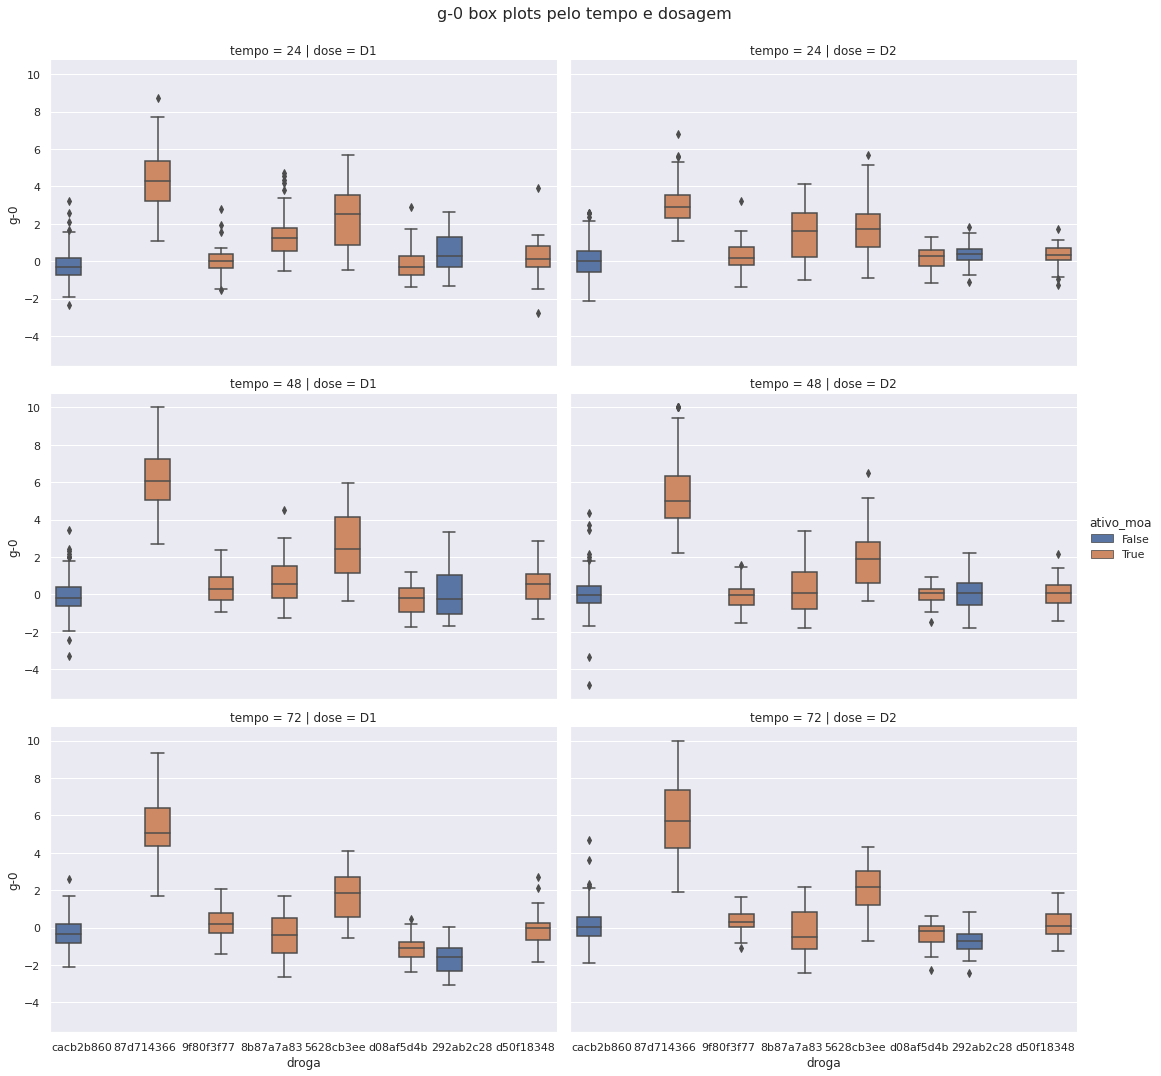

In [ ]:
droga_principal = data_completo['droga'].value_counts().index[:8]

g = sns.catplot(x="droga", y="g-0",
                hue="ativo_moa", row='tempo', col="dose",
                data=data_completo.query(f'droga in @droga_principal'), 
                kind="box", order=droga_principal, aspect=1.5);

g.fig.subplots_adjust(top=0.93)
g.fig.suptitle('g-0 box plots pelo tempo e dosagem', fontsize=16)

Nos gráficos acima, temos os box plot dos 8 compostos candidatos a droga mais frequentes em ordem do maior para o menor, onde laranja indica que aquele composto ativou algum mecanismo de ação, e azul indica que não. O composto mais frequente se encontra a esquerda, e é o solvente do grupo de controle, como visto anteriormente. Ele é nossa referência para saber se houve ou não aumento na expressão genetica. Podemos observar também que, da esquerda para direita:

* O segundo composto tende a influenciar mais no g-0 depois de 48 hs de exposição. Pode-se verificar esse aumento nas duas dosagens.

* O terceiro composto teve pouquissima influencia, se não nenhuma, no g-0

* O quarto composto só afetou um pouco o g-0 nas primeiras 24hs de exposição. Depois disso, voltou ao normal, usando o controle como referência.

* O quinto composto teve um efeito constante no g-0, independente da dosagem e do tempo de exposição.

* O sexto, sétimo e o oitavo composto, assim como o terceiro composto, não tivera, nenhum efeito em g-0

* Nesse gráfico, não é possível ver claramente a diferença em termos de expressão genetica no g-0 independente da dosagem. A maior discrepância foi entre o segundo composto nas primeiras 24hs.

Se formos avaliar os outros Gs, é provável que tenhamos diferente conclusoes, tendo em vista que cada composto deve agir diretamente em genes diferentes. O único que provavelmente se mantenha constante, independente das nossos explorações é o setimo composto, pois, assim como o controle, não ativa nenhum mecanismo de ação, logo, não deve ter tanta influência nos genes e grupo celulares.


In [ ]:
data_completo.groupby(['droga','ativo_moa']).count().reset_index().duplicated(subset=['droga']).unique()

array([False])

A ideia desse trecho de código é verificar se há alguma droga que ativa e não ativa mecanismos de ação dependendo da configuração de tempo de exposição e dosagem. Por exemplo: a droga A ativa um mecanismo de ação com a dosagem D1 em 48hs, mas na dosagem D2 em 72hs, nenhum mecanismo de ação é ativado. Foi verificado que isso não ocorre, portanto não é algo a se levar em conta na hora da modelagem.

In [ ]:
results = data[['id','droga']]

results = results.merge(data_resultados, on='id')

results = results.drop(columns=['id','ativo_moa','n_moa'])

results = results[~results.duplicated()]

results.duplicated(subset=['droga']).unique()

array([False])

Já nesse trecho de codigo, o que queriamos verificar era se, dependendo da configuração de tempo de exposição e dosagem, um candidato a droga ativou determinado mecanismo de ação e em outra configuração ativou OUTRO mecanismo de ação, que não o que tinha ativado previamente. Verificamos que esse caso também não ocorre. 

## Estruturação dos dados

Agora que exploramos um pouco os dados, vamos modela-los para serem utilizados nos modelos que foram proposto previamente. Queremos identificar apenas qual a ação do mecanismo de ação, de acordo com os dados passados. Vamos modelar nosso dataset para ficar adequado a isso:

In [ ]:
data_resultados_formatados = data_resultados.copy()
data_resultados_formatados.drop(['n_moa','ativo_moa'], axis=1, inplace=True)

new_columns = []
for column in data_resultados_formatados.columns:
    new_columns.append(column.split('_')[-1])

data_resultados_formatados.columns = new_columns
data_resultados_formatados = data_resultados_formatados.groupby(by=data_resultados_formatados.columns, sort=False, axis=1).sum()
data_resultados_formatados = pd.concat([data_resultados_formatados['id'], data_resultados_formatados.loc[:,'inhibitor':].apply(lambda x: x>0).astype('int64')], axis=1)
data_resultados_formatados

id  inhibitor  agonist  antagonist  ...  donor  medium  steroid  b
0      id_000644bb2          1        0           0  ...      0       0        0  0
1      id_000779bfc          0        0           0  ...      0       0        0  0
2      id_000a6266a          1        0           0  ...      0       0        0  0
3      id_0015fd391          0        0           0  ...      0       0        0  0
4      id_001626bd3          0        0           0  ...      0       0        0  0
...             ...        ...      ...         ...  ...    ...     ...      ... ..
23809  id_fffb1ceed          0        0           1  ...      0       0        0  0
23810  id_fffb70c0c          0        1           0  ...      0       0        0  0
23811  id_fffc1c3f4          0        0           0  ...      0       0        0  0
23812  id_fffcb9e7c          1        0           0  ...      0       0        0  0
23813  id_ffffdd77b          0        0           0  ...      0       0        0  0

[23814 rows x 31 columns]

In [ ]:
data_resultados_formatados.drop('id', axis=1).to_numpy()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
len(set(new_columns))

31

Primeiramente, vamos ajustar os resultados para ficar somente a ação do mecanismo de ação. Isso foi feito renomeando as colunas para ficaram apenas a ação e utilizando um `groupby`, para agrupar colunas com nomes semelhantes. Após isso, foi feita uma breve verificação se estava sendo pega o numero certo de ações (31) e foi verificado que sim. Após isso, foi transformado cada campo para True ou False, se tiver ou não aquela ação. No caso, isso foi feito para descartar alguns valores numéricos que vieram decorrentes do `sum()`. Se o experimento ativou 3 inhibitor, não queriamos que ele tivesse peso maior, apenas que ele sinalizasse que houve aquela ação naquele experimento. Por fim, esse valor foi convertido para 0 e 1, para melhor utilização nos modelos de aprendizado de máquina.

In [ ]:
data_completo_formatados = pd.get_dummies(data, columns = ['tratamento','tempo','dose']).merge(data_resultados_formatados, on='id').drop('id', axis=1)

data_completo_formatados

droga     g-0     g-1     g-2  ...  donor  medium  steroid  b
0      b68db1d53  1.0620  0.5577 -0.2479  ...      0       0        0  0
1      df89a8e5a  0.0743  0.4087  0.2991  ...      0       0        0  0
2      18bb41b2c  0.6280  0.5817  1.5540  ...      0       0        0  0
3      8c7f86626 -0.5138 -0.2491 -0.2656  ...      0       0        0  0
4      7cbed3131 -0.3254 -0.4009  0.9700  ...      0       0        0  0
...          ...     ...     ...     ...  ...    ...     ...      ... ..
23809  df1d0a5a1  0.1394 -0.0636 -0.1112  ...      0       0        0  0
23810  ecf3b6b74 -1.3260  0.3478 -0.3743  ...      0       0        0  0
23811  cacb2b860  0.3942  0.3756  0.3109  ...      0       0        0  0
23812  8b87a7a83  0.6660  0.2324  0.4392  ...      0       0        0  0
23813  972f41291 -0.8598  1.0240 -0.1361  ...      0       0        0  0

[23814 rows x 910 columns]

Nos nossos dados dos experimentos, haviam as colunas categoricas 'tratamento', 'tempo' e 'dose'. Para melhor utilização no modelo, foram transformadas essas categorias em colunas numericas, indicando a presença de cada um delas com 1 ou 0. Por fim, foram unidos os dados dos resultados com o resto dos dados.

No nosso dataset, possuímos uma dimensionalidade muito grande (910 colunas), utilizaremos *Principal Component Analysis* para diminuir a dimensionalidade e conseguimos melhores resultados nos nossos modelos de aprendizado de máquina.

In [ ]:
from sklearn.decomposition import PCA

seed = 171

pca = PCA(n_components=200, random_state=seed)


No codigo acima, apenas inicializamos nosso operador 'PCA', que será uma transformação que será aplicada no nosso treino antes de calcularmos o modelo. Dessa forma, a dimensionalidade será reduzida melhorando nossos resultados. É um tema bem interessante, mas devido ao tempo, não me aprofundarei muito. Mais detalhes podem ser encontrados [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) e [aqui](https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/#:~:text=Perhaps%20the%20most%20popular%20technique,prior%20to%20fitting%20a%20model.).

Agora temos nosso dataset pronto para testar os modelos para tentar solucionar nosso problema de predição: Determinar quais ações dos mecanismos de ação aquele experimento ativou.

## Experimentos com modelos de aprendizado de máquina

Agora iremos começar a experimentar com os modelos. Primeiro, iremos testar o *Multi Layer Perceptron*.

In [ ]:
from sklearn.model_selection import train_test_split

x = data_completo_formatados.loc[:,'g-0':'dose_D2']
y = data_completo_formatados.loc[:,'inhibitor':]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=seed)

Primeiramente, foi dividido os dados entre grupo de treino e grupo de teste. Dessa forma, após o treinamento, é possível avaliar os modelos com dados desconhecidos, de forma que não tenha baixo viés e alta variancia, caracterizando *overfitting*. Esse é um problema bastante comum que cientista de dados tem que lidar o *Bias-Variance Trade off*.

In [ ]:
pca.fit(x_treino)

x_treino_pca = pca.transform(x_treino)
x_teste_pca = pca.transform(x_teste)

In [ ]:
x.shape

(23814, 879)

In [ ]:
x_treino_pca.shape

(19051, 200)

In [ ]:
pca.explained_variance_ratio_.sum()

0.8371729119016639

Podemos verificar que a quantidade de colunas foi reduzida drasticamente. Isso pode ser feito sem uma perca significativa dos dados. Como mostrado na ultima linhas, nossos vetores do PCA conseguem captar 83,7% da variancia dos dados. Sim, existe uma certa perca, e isso pode influenciar nosso problema, mas por motivos de performance dos nossos algoritmos, é um sacrifício válido.

In [49]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=seed, hidden_layer_sizes=(150,75,), learning_rate_init=0.0002, max_iter=1000)

mlp.fit(x_treino_pca, y_treino)
mlp.score(x_teste_pca, y_teste)

0.41360487087969766

Um resultado não muito bom... Se fosse um problema binário, seria menos eficiente do que jogar uma moeda! Nesse caso, como temos 30 classes, seria melhor que um chute, que teria 1/30 = 0.03 = 3% de chance de acerto. Ainda assim, não é um bom modelo, considerando que estamos falando de remedios e saúde no nosso problema. Vamo seguir para a proxima abordagem: Auto-ML

In [ ]:
# !apt-get install swig -y
# !pip install Cython numpy
# !pip install distributed
# !pip install auto-sklearn==0.12.3
# !pip install pydataset

In [47]:
from autosklearn.classification import AutoSklearnClassifier
from sklearn.metrics import accuracy_score

automl = AutoSklearnClassifier()
automl.fit(x_treino_pca, y_treino)
print("Accuracy score", accuracy_score(y_teste, automl.predict(x_teste_pca)))

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


[WARNING] [2021-05-10 01:20:06,982:Client-AutoMLSMBO(1)::d9973612-b12d-11eb-900f-0242ac1c0002] Configuration 302 not found
[WARNING] [2021-05-10 01:20:06,984:Client-AutoMLSMBO(1)::d9973612-b12d-11eb-900f-0242ac1c0002] Configuration 40 not found
[WARNING] [2021-05-10 01:20:06,984:Client-AutoMLSMBO(1)::d9973612-b12d-11eb-900f-0242ac1c0002] Configuration 265 not found
[WARNING] [2021-05-10 01:20:06,984:Client-AutoMLSMBO(1)::d9973612-b12d-11eb-900f-0242ac1c0002] Configuration 235 not found
[WARNING] [2021-05-10 01:20:06,984:Client-AutoMLSMBO(1)::d9973612-b12d-11eb-900f-0242ac1c0002] Configuration 355 not found
[WARNING] [2021-05-10 01:20:06,984:Client-AutoMLSMBO(1)::d9973612-b12d-11eb-900f-0242ac1c0002] Configuration 422 not found
[WARNING] [2021-05-10 01:20:06,985:Client-AutoMLSMBO(1)::d9973612-b12d-11eb-900f-0242ac1c0002] Configuration 28 not found
[WARNING] [2021-05-10 01:20:06,987:Client-AutoMLSMBO(1)::d9973612-b12d-11eb-900f-0242ac1c0002] Configuration 694 not found
[WARNING] [2021-05

In [48]:
print(automl.sprint_statistics())


auto-sklearn results:
  Dataset name: d9973612-b12d-11eb-900f-0242ac1c0002
  Metric: f1_macro
  Number of target algorithm runs: 894
  Number of successful target algorithm runs: 0
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 894



Depois de uma hora de execução, não foi encontrados resultados proveitosos. Ao verificar o modelo, foi encontrado que houve estouro de memória na execução dos algoritmos, provavelmente ocasionado pelo ambiente em que foi executado. É necessário maiores estudos para verificar se seria possível melhorar os resultados. Agora, vamos para a última abordagem: XGBoost.

In [46]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      n_estimators=200, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10,
                      random_state = seed))
model.fit(x_treino_pca, y_treino)
model.score(x_teste_pca, y_teste)

0.49464623136678565

O resultado do XGBoost, apesar de se mostrar melhor resultado de todos, não foi muito satisfatorio também. Vale ressaltar que para solução de problemas multiclassificação, XGBoost não é tão apto para tal, sem algumas alterações, o que pode ter prejudicado o nosso resultado final. Além disso, ele possui muitos parametros que podem se ajustar para melhores performance, sendo necessário um desprendimento maior no estudo desses parametros para um melhor modelo.

## Conclusões

De todos os resultados, o XGBoost foi o que performou melhor sem muitos ajustes de parâmetros, o que era de certa forma esperado pela qualidade do modelo. Apesar do baixo resultado de maneira geral, foi possível uma melhor predição do que um chute aleatorio com o XGBoost, chegando a quase 50% de acurácia. Contudo, vale ressaltar que ainda não é apto para o contexto de remedios e saúde, que tem pouca margem para erro.

 Além disso, foi possível explorar bem o dataset e conseguimos testar algumas bibliotecas novas, que no futuro podem servir bem para gente. Durante pesquisas, foi encontrado o framework [Optuna](https://optuna.readthedocs.io/en/stable/) para otimização de parametros dos modelos, que pode ser utilizado para melhores resultados! O ideal seria aplicá-lo no nosso melhor modelo, para encontrarmos quais parâmetros são os mais indicados para o nosso modelo! :)

## Referencias

[Documentação do SciKit-learn](https://scikit-learn.org/stable/index.html)

[Principal Component Analysis for Dimensionality Reduction in Python](https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/#:~:text=Perhaps%20the%20most%20popular%20technique,prior%20to%20fitting%20a%20model.)

[Optuna](https://optuna.readthedocs.io/en/stable/)

[Chose among highly correlated variables - StackOver](https://datascience.stackexchange.com/questions/65815/chose-among-highly-correlated-variables)

[Multicollinearity in Regression Analysis: Problems, Detection, and Solutions](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)

Aulas da terceira imersão de dados da Alura

[Drug discovery: passado, presente e futuro](https://docs.google.com/document/d/10EhrQBChlyYIcff3to7PrCQi5HcNk2r-zd2ZCKPtcz8/edit)

[Expressão Gênica](https://drive.google.com/file/d/1VNP08ffCiGD8cqaBkdHATWSX8Yxfm3dj/view)

[How to Develop Your First XGBoost Model in Python](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/)

[Fine-tuning XGBoost in Python like a boss](https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e)

[Rules-of-thumb for building a Neural Network](https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af)
